# Problem: Lead Scoring Model

Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads won’t turn into actual bookings. So there is a need for a system that prioritises the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on.

Here you have a dataset of leads with their set of features and their status. You have to build a ML model that predicts the lead score as an OUTPUT on the basis of the INPUT set of features. This lead score will range from 0-100, so more the lead score means more chances of conversion of lead to WON.

NOTE: The leads with STATUS other than ‘WON’ or ‘LOST’ can be dropped during training.

NOTE: Treat all columns as CATEGORICAL columns

NOTE: 
This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column.

Steps should be:
1. Data Cleaning ( including Feature Selection)
2. Training ( on Y percent of data)
3. Testing ( on (100-Y) percent of data)
4. Evaluate the performance using metrics such as accuracy, precision, recall and F1-score.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data_Science_Internship - Dump.csv",index_col=0)

In [3]:
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
df.tail()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,LOST,Low availability,1108,294,30/08/22,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f566706715d2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46607,1ea65ea38f2f574b3875ba895e4ff76b284b7725041612...,LOST,Low availability,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,01/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,1496126b7015defbc3b1d129a46096a5c135075aff2add...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,618738f7143c9b43a98a6b42d743a6595069a9b4dcf42d...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,7520a8abba2b44d7f37c0ddbe5f7f3d87540b2b7a670e9...


# Cleaning the data

Cleaning the gibberish (which has to be treated as Null)

In [5]:
df['Agent_id'][0],len(df['Agent_id'][0])


('1deba9e96f404694373de9749ddd1ca8aa7bb823145a6fe3491dec605a526a92', 64)

In [6]:
df['source'][0],len(df['source'][0])

('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', 64)

In [7]:
df['des_city'][0],len(df['des_city'][0])

('ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7', 64)

### The length of the gibberish is 64 characters.

In [8]:
for cols in df.columns:
    df[cols] = df[cols].apply(lambda x: np.nan if len(str(x)) == 64 else x) #applying NaN values in place of gibberish text

In [9]:
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,NaN,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ensuite,NaN
3,NaN,LOST,Low budget,0-0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.nunique()

Agent_id             0
status               6
lost_reason         30
budget            1857
lease              311
movein             477
source               0
source_city          0
source_country       0
utm_source           0
utm_medium           0
des_city             0
des_country          0
room_type            5
lead_id              0
dtype: int64

In [11]:
df.isnull().sum()

Agent_id          46608
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source            46608
source_city       46608
source_country    46608
utm_source        46608
utm_medium        46608
des_city          46608
des_country       46608
room_type         23547
lead_id           46608
dtype: int64

### Dropping Columns with complete null values

In [12]:
columns_to_drop = []
for cols in df.columns:
    if df[cols].isnull().sum() == 46608:
        columns_to_drop.append(cols)

columns_to_drop

['Agent_id',
 'source',
 'source_city',
 'source_country',
 'utm_source',
 'utm_medium',
 'des_city',
 'des_country',
 'lead_id']

In [13]:
df.drop(columns_to_drop,axis=1,inplace=True)

In [14]:
df.columns

Index(['status', 'lost_reason', 'budget', 'lease', 'movein', 'room_type'], dtype='object')

## Check for value counts

In [15]:
for cols in df.columns:
    print(f'{cols}:\n{df[cols].value_counts()}') 
    print("="*50)

status:
LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64
lost_reason:
Low availability                  8892
Not responding                    7827
Not interested                    6449
Low budget                        5505
Wants private accommodation       2781
Short stay                        2264
Not a student                     1518
Just Enquiring                    1263
Inadequate details                 827
Semester stay                      817
Booked with manager                676
Junk lead                          629
Booked on campus accommodation     613
Supply issue                       538
No supply                          534
Not serving in that region         411
Repeat lead                        394
Booked with competitor             356
Not going to university            329
Distance issue                     219
Junk lead/ Just Enquiring          147
Lead is

# Insight:

1. Lost reason: The following categories can be clubbed together:

    Not a student,Not going to university,Underage student
    
    Junk lead,Just Enquiring,Junk lead/ Just Enquiring
    
    low availability,supply issue,no supply
    
    Not responding,Didn't respond in time
    
    
2. Lease can be converted into bins

3. Budget can be converted to minimum and maximum budget columns

4. Status: Only Lost and Won to be considered for training

# Cleaning the Budget column 

In [16]:
df['budget'].head()

0                     NaN
1                     NaN
2    £121 - £180 Per Week
3                     0-0
4                     NaN
Name: budget, dtype: object

In [17]:
# np.set_printoptions(threshold=np.inf)
pd.set_option("display.max_rows", None)

df['budget'].value_counts()

£60 - £120 Per week                                     9862
£121 - £180 Per Week                                    8954
0-0                                                     5733
£181 - £240 Per Week                                    2171
100                                                     1516
150                                                     1088
£241 - £300 Per week                                     720
> 300£ Per Week                                          698
200                                                      644
120                                                      550
130                                                      418
160                                                      386
110                                                      378
180                                                      360
140                                                      360
250                                                      314
170                     

Observations:
1. Almost all of the budget are in weekly period.
2. The values are in either of the following format:

    a. a single number
    
    b. number-number text
    
    c. number text
    
    d. 0-text-number
    
    e. 0-number text
    
    f. 0-number text number
    
    g. only text
    
    First let's get an o/p in number number format, then in two seperate columns divide into minimum and maximum budget.

### Writing a function to seperate numbers from text and make it into desired number-number format:
        

In [18]:
import re

def text_splitter(text):
    
    if type(text) != float:
        if bool(re.match(r'([a-zA-Z]+)',text)):
            x = re.findall(r'([a-zA-Z]+)',text)
            word = ' '.join(x)
            return word.replace(word,'0')
        
        elif bool(re.match(r'(.?[0-9]+)',text)):
            x = re.findall(r'([0-9]+)',text)
            word = ' '.join(x)
            listed_num = []
            for i in word.split(" "):
                listed_num.append(i) # Appending the numbers in the list so to access through the index values
        
            if listed_num[0]=='0' and len(listed_num)==3: # some output of the above code shall have 3 numbers,with 0 at index 0.
                x = listed_num[1] # we require the numbers at index1 and index2
                y = listed_num[2]
                return " ".join([x,y]) # it will o/p the numbers seperated by space
            else:
                return word # if the len(listed_num) is not 3 then it will return the o/p of the first if statement 
    else:
        return text

#### Testing the function:

In [19]:
a = 'not tight on budget'
b = '£121 - £180 Per Week'
c= '0-I have some other query first'
d= '>185/week'
e = '0-90-100 per week'

testlist = [a,b,c,d,e]

for i in testlist:
    print(text_splitter(i))

0
121 180
0
185
90 100


#### Applying the function to the budget column 

In [20]:
df['budget_temp'] = df['budget'].apply(text_splitter)

In [21]:
df.head(20)

,status,lost_reason,budget,lease,movein,room_type,budget_temp
0,LOST,Not responding,NaN,NaN,NaN,NaN,NaN
1,LOST,Low budget,NaN,NaN,NaN,NaN,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,Ensuite,121 180
3,LOST,Low budget,0-0,0,NaN,NaN,0 0
4,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN
5,LOST,Wants private accommodation,120,semester-stay,NaN,NaN,120
6,LOST,Short stay,0-0,0,NaN,NaN,0 0
7,LOST,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,Entire Place,181 240
8,LOST,Low budget,100,Semester Stay 20 - 24 weeks,NaN,NaN,100
9,LOST,Booked with manager,270,51,NaN,NaN,270


#### Writing function to seperate minimum and maximum budget from the budget_temp column

In [22]:
def min_budget(text):
    if type(text)!= float and text is not None:
        num = text.split(' ')[0]
        return float(num)
    else:
        return (text)
    
def max_budget(text):
    listed_num = []
    
    if type(text)!= float and text is not None:
        for i in text.split(" "):
            listed_num.append(i)
        if len(listed_num)>=2:
            return text.split(' ')[1]
        else:
            return text
    else:
        return text

In [23]:
df['min_budget'] = df['budget_temp'].apply(min_budget)

In [24]:
df['max_budget'] = df['budget_temp'].apply(max_budget)

#### Converting the min and max budget columns to float type

In [25]:
df['min_budget'] = df['min_budget'].astype(float)
df['max_budget'] = df['max_budget'].astype(float)

In [26]:
df.head()

,status,lost_reason,budget,lease,movein,room_type,budget_temp,min_budget,max_budget
0,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,Ensuite,121 180,121.0,180.0
3,LOST,Low budget,0-0,0,NaN,NaN,0 0,0.0,0.0
4,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check for outliers in the min and max budget columns

<AxesSubplot:ylabel='max_budget'>

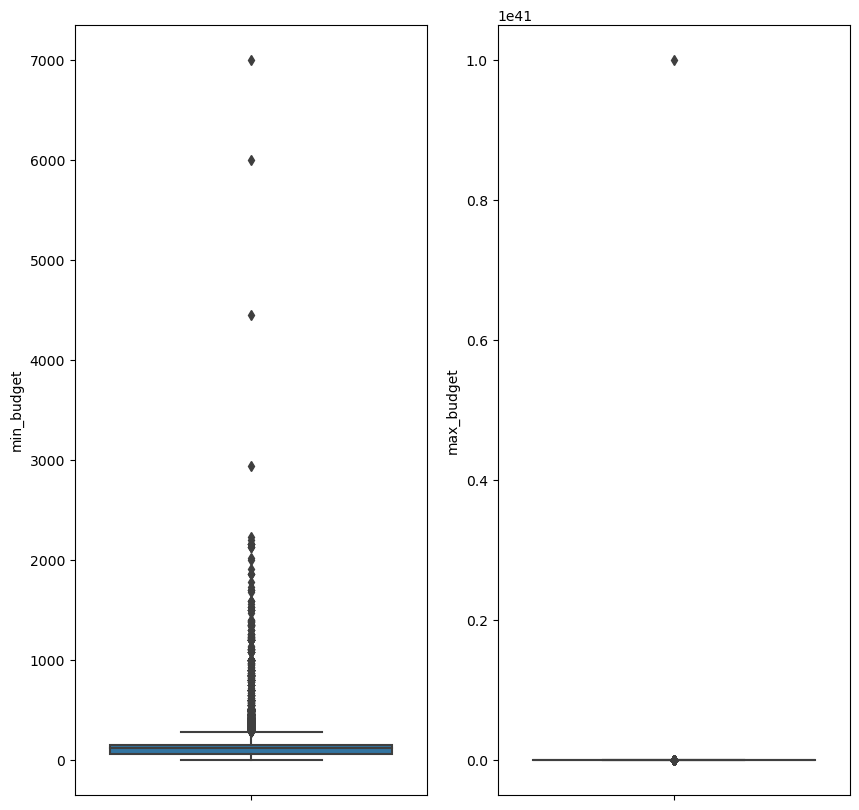

In [27]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(10)

sns.boxplot(y=df['min_budget'],ax=ax[0])
sns.boxplot(y=df['max_budget'],ax=ax[1])

In [28]:
budget = ['min_budget','max_budget']

for i in budget:
    print(f"For {i}:")
    print('minimum value: ',df[i].min())
    print('maximum value: ',df[i].max())
    print('average value: ',df[i].mean())
    print('mode         : ',df[i].mode())
    print('\n')
    

For min_budget:
minimum value:  0.0
maximum value:  7000.0
average value:  116.15996967399545
mode         :  0    60.0
Name: min_budget, dtype: float64


For max_budget:
minimum value:  0.0
maximum value:  1e+41
average value:  2.3692191053828657e+36
mode         :  0    120.0
Name: max_budget, dtype: float64




### The outliers are present and data is heavily skewed.

### Filling NA values with median

In [29]:
df['min_budget'].median(),df['max_budget'].median()

(121.0, 140.0)

In [30]:
df['min_budget'] = df['min_budget'].fillna(121.0)

df['max_budget'] = df['max_budget'].fillna(140.0)



### Detecting and Handling Outliers in budget columns:

* Detecting Outlier: We can use IQR to identify the outliers,
* Handling outlier: Since mean is heavily affected by the outlier,we shall use median

In [31]:
budget_outlier = []


def df_outlier_iqr(data): #making a function to detect outlier using IQR 
    
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    lower_fence = q1-(1.5*iqr)
    higher_fence = q3+(1.5*iqr)
    
    for index,row in data.items():
        if row < lower_fence or row > higher_fence:
            budget_outlier.append(row)
    return budget_outlier

### Handling the Budget Outlier:




In [32]:
df_outlier_iqr(df['min_budget']) # Applying the function to min_budget column

min_budget_median = df['min_budget'].median() # using median value to replace the outliers

for i in budget_outlier:
    df['min_budget'] = df['min_budget'].replace(i, min_budget_median)

In [33]:
df_outlier_iqr(df['max_budget'])# Applying the function to max_budget column

max_budget_median = df['max_budget'].median() # using median value to replace the outlier

for i in budget_outlier:
    df['max_budget'] = df['max_budget'].replace(i, max_budget_median)

<AxesSubplot:ylabel='max_budget'>

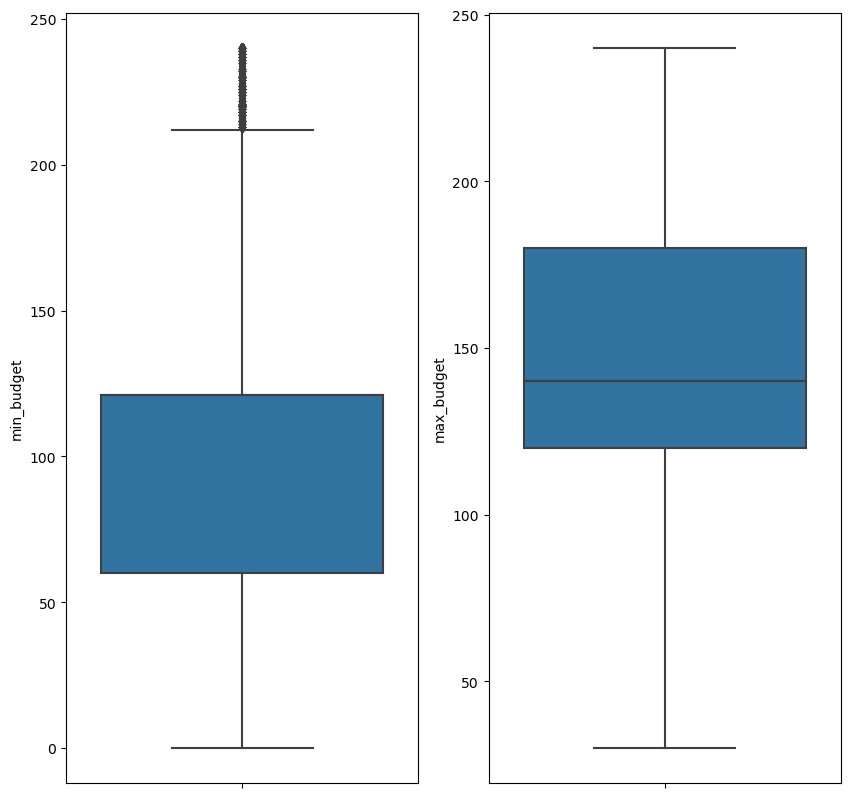

In [34]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(10)

sns.boxplot(y=df['min_budget'],ax=ax[0])
sns.boxplot(y=df['max_budget'],ax=ax[1])

In [35]:
df['min_budget'].skew(),df['max_budget'].skew()

(-0.21439801499007008, 0.7874655904339116)

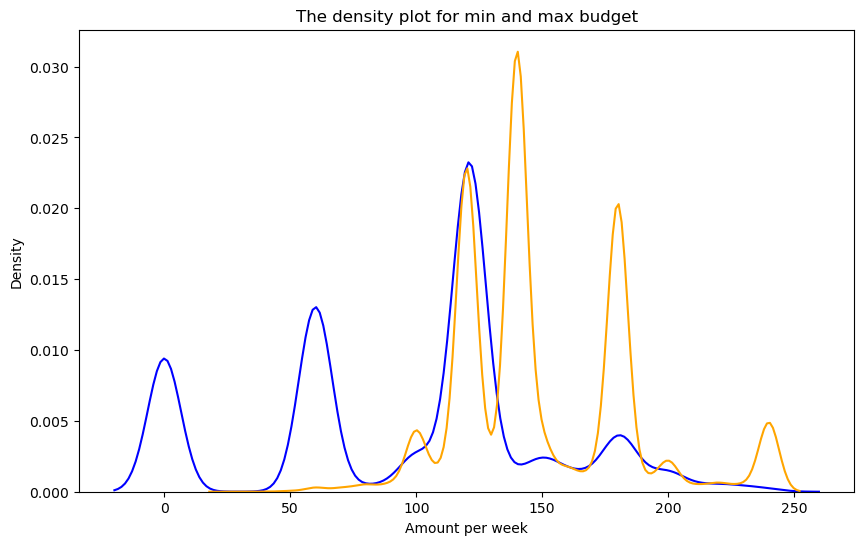

In [108]:
fig,ax = plt.subplots(1,1)
fig.set_figwidth(10)
fig.set_figheight(6)

sns.kdeplot(x=df['min_budget'],color='blue')
sns.kdeplot(x=df['max_budget'],color='orange')



plt.xlabel('Amount per week')
plt.title('The density plot for min and max budget')
plt.show()

## Room Type column:

In [37]:
df['room_type'].value_counts()

Ensuite         12477
Studio           6383
Entire Place     4198
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [38]:
df['room_type'].isnull().sum()

23547

Text(0.5, 1.0, 'Count of Room type')

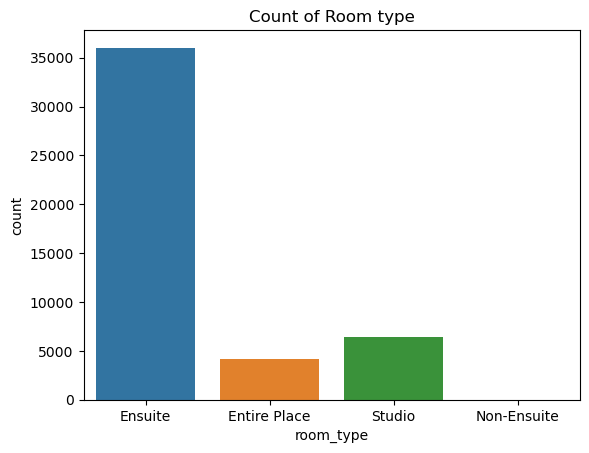

In [109]:
sns.countplot(df['room_type'])

plt.title('Count of Room type')

### Filling the na values with the mode (Ensuite) 

In [40]:
df['room_type'] = df['room_type'].fillna('Ensuite')

In [41]:
df['room_type'].value_counts()

Ensuite         36024
Studio           6383
Entire Place     4198
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [42]:
df[df['room_type']=='Twin-Studio']

,status,lost_reason,budget,lease,movein,room_type,budget_temp,min_budget,max_budget
1925,LOST,Not interested,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,30/08/22,Twin-Studio,60 120,60.0,120.0


In [43]:
df.drop(1925,inplace=True)

# Cleaning and preprocessing lost_reason column:


In [44]:
df['lost_reason'].value_counts()

Low availability                  8892
Not responding                    7827
Not interested                    6448
Low budget                        5505
Wants private accommodation       2781
Short stay                        2264
Not a student                     1518
Just Enquiring                    1263
Inadequate details                 827
Semester stay                      817
Booked with manager                676
Junk lead                          629
Booked on campus accommodation     613
Supply issue                       538
No supply                          534
Not serving in that region         411
Repeat lead                        394
Booked with competitor             356
Not going to university            329
Distance issue                     219
Junk lead/ Just Enquiring          147
Lead issue                         127
Looking for admission               41
Didn't respond in time              35
Visa/admission denied               17
Guarantor issue          

### INSIGHTS:
 
 
 Lost reason: The following categories can be clubbed together:

    Not a student: Not going to university,Underage student,Looking for admission,Visa/admission denied
    
    Junk lead: Just Enquiring,Junk lead/ Just Enquiring,Not interested,Inadequate details,Repeat lead
    
    low availability: supply issue,no supply,Not serving in that region
    
    Not responding: Didn't respond in time
    
    Low budget: Looking for loan,Looking for Scholarship
    
    Stay_issue: Short stay, Semester stay

In [45]:
not_a_student = {'Not going to university':"Not a student",
                'Underage student':"Not a student",
                'Looking for admission':"Not a student",
                'Visa/admission denied':"Not a student"}

junk_lead = {'Just Enquiring':'Junk lead',
             'Junk lead/ Just Enquiring':'Junk lead',
             'Not interested':'Junk lead',
             'Inadequate details':'Junk lead',
            'Repeat lead':'Junk lead',
             'Lead issue':'Junk lead'
            }

low_availability = {'Supply issue':'Low availability',
                    'No supply':'Low availability',
                    'Not serving in that region':'Low availability'}

low_budget = {'Looking for loan':'Low budget',
              'Looking for Scholarship':'Low budget'}

not_responding = {"Didn't respond in time":"Not responding"}


stay_issue = {'Short stay':'Short_or_Sem_stay','Semester stay':'Short_or_Sem_stay'}
                


In [46]:
df['lost_reason'] = df['lost_reason'].replace(not_a_student)
df['lost_reason'] = df['lost_reason'].replace(junk_lead)
df['lost_reason'] = df['lost_reason'].replace(low_availability)
df['lost_reason'] = df['lost_reason'].replace(low_budget)
df['lost_reason'] = df['lost_reason'].replace(not_responding)
df['lost_reason'] = df['lost_reason'].replace(stay_issue)

In [47]:
df['lost_reason'].value_counts()

Low availability                  10375
Junk lead                          9835
Not responding                     7862
Low budget                         5518
Short_or_Sem_stay                  3081
Wants private accommodation        2781
Not a student                      1909
Booked with manager                 676
Booked on campus accommodation      613
Booked with competitor              356
Distance issue                      219
Guarantor issue                      17
Cross sell                            1
Name: lost_reason, dtype: int64

In [48]:
df['lost_reason'].isnull().sum()

3364

In [49]:
df['lost_reason'].mode()

0    Low availability
Name: lost_reason, dtype: object

In [50]:
df['lost_reason'].fillna('Low availability',inplace=True)

In [51]:
df.head()

,status,lost_reason,budget,lease,movein,room_type,budget_temp,min_budget,max_budget
0,LOST,Not responding,NaN,NaN,NaN,Ensuite,NaN,121.0,140.0
1,LOST,Low budget,NaN,NaN,NaN,Ensuite,NaN,121.0,140.0
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,Ensuite,121 180,121.0,180.0
3,LOST,Low budget,0-0,0,NaN,Ensuite,0 0,0.0,140.0
4,LOST,Junk lead,NaN,NaN,NaN,Ensuite,NaN,121.0,140.0


# Sepearting the month from movein column

In [52]:
import datetime as dt

df['month'] = pd.DatetimeIndex(df['movein'],dayfirst=True).month

In [53]:
df['month'].value_counts()

9.0     23064
8.0      6660
7.0      1158
10.0      781
1.0       666
12.0      269
11.0      146
6.0       110
2.0        52
5.0        29
3.0        19
4.0        15
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

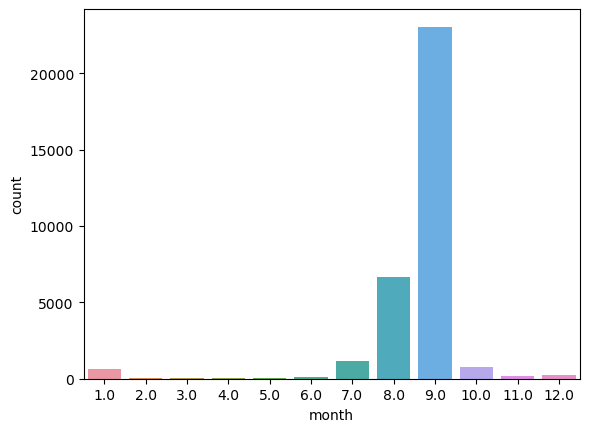

In [54]:
sns.countplot(df['month'])

### The 9th month, September has the highest movein count.

In [55]:
df['month'] = df['month'].fillna(9.0)

df.head()

,status,lost_reason,budget,lease,movein,room_type,budget_temp,min_budget,max_budget,month
0,LOST,Not responding,NaN,NaN,NaN,Ensuite,NaN,121.0,140.0,9.0
1,LOST,Low budget,NaN,NaN,NaN,Ensuite,NaN,121.0,140.0,9.0
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,Ensuite,121 180,121.0,180.0,8.0
3,LOST,Low budget,0-0,0,NaN,Ensuite,0 0,0.0,140.0,9.0
4,LOST,Junk lead,NaN,NaN,NaN,Ensuite,NaN,121.0,140.0,9.0


In [56]:
df_prepared = df.drop(['budget','lease','movein','budget_temp','month'],axis=1)

In [57]:
df_prepared.head()

,status,lost_reason,room_type,min_budget,max_budget
0,LOST,Not responding,Ensuite,121.0,140.0
1,LOST,Low budget,Ensuite,121.0,140.0
2,LOST,Not responding,Ensuite,121.0,180.0
3,LOST,Low budget,Ensuite,0.0,140.0
4,LOST,Junk lead,Ensuite,121.0,140.0


# Check for Imabalanced data:

As stated, the lead status other then 'Won' and 'Lost' can be dropped

In [58]:
status_to_drop = ['OPPORTUNITY','CONTACTED','PROCESSING','IMPORTANT']

In [59]:
indices_to_drop = []

for index,row in df['status'].items():
    if row in status_to_drop:
        indices_to_drop.append(index)
        

In [60]:
for i in indices_to_drop:
    df_prepared.drop(i,axis=0,inplace=True)

In [61]:
df_prepared['status'].value_counts()

LOST    43243
WON      3073
Name: status, dtype: int64

In [62]:
round(df_prepared['status'].value_counts()/len(df_prepared)*100,3)

LOST    93.365
WON      6.635
Name: status, dtype: float64

In [63]:
df_prepared['status'] = df_prepared['status'].map({'LOST':0,'WON':1})

In [64]:
df_prepared.head()

,status,lost_reason,room_type,min_budget,max_budget
0,0,Not responding,Ensuite,121.0,140.0
1,0,Low budget,Ensuite,121.0,140.0
2,0,Not responding,Ensuite,121.0,180.0
3,0,Low budget,Ensuite,0.0,140.0
4,0,Junk lead,Ensuite,121.0,140.0


In [65]:
labels = ['Lost','Won']

labels

['Lost', 'Won']

In [66]:
values = [df_prepared.status[df_prepared['status']==0].count(),df_prepared.status[df_prepared['status']==1].count()]

values

[43243, 3073]

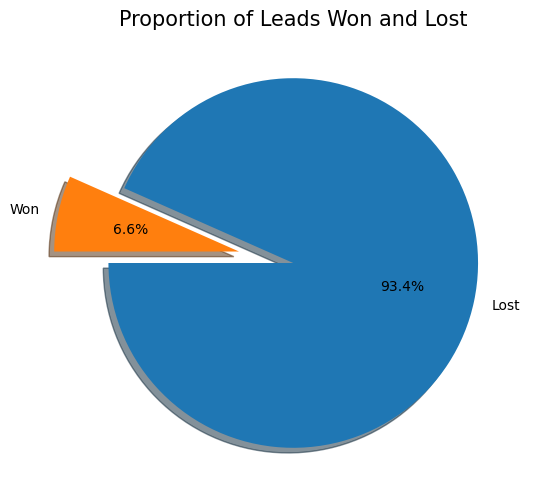

In [110]:
fig,ax = plt.subplots(figsize=(6,6))

plt.pie(x=values,labels=labels,autopct='%1.1f%%',explode=(0,0.3),shadow=True,startangle=180)

plt.title('Proportion of Leads Won and Lost',pad=5,fontsize=15)
plt.show()

## Over 93% of the data belongs to the LOST class. The dataset is imabalanced.

## Solution is to use SMOTE to handle such imbalance.

# Data Prepration for train test split:

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [69]:
X = df_prepared.drop(['status'],axis=1)
y = df_prepared['status']

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (32421, 4)
Shape of X_test: (13895, 4)


In [71]:
unique_y, count_y = np.unique(y_train,return_counts=True)

target_valuecount = {k:v for (k,v) in zip(unique_y,count_y)}
target_valuecount

{0: 30273, 1: 2148}

# SMOTE-NC for oversampling

### By using SMOTENC we can resample the categorical data 

In [72]:
from imblearn.over_sampling import SMOTENC


smt_nc = SMOTENC(categorical_features=[0,1])

In [73]:
X_train_res,y_train_res = smt_nc.fit_resample(X_train,y_train)

In [74]:
y_train_res.value_counts()

0    30273
1    30273
Name: status, dtype: int64

In [75]:
y_test.value_counts()

0    12970
1      925
Name: status, dtype: int64

# Model Building and Training

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report

In [77]:
categorical_cols = ['lost_reason','room_type']


numerical_cols = ['min_budget','max_budget']

In [78]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_cols)
    ])


# Gradient Boosting: 

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=1000, 
                                    learning_rate=0.01,
                                    max_depth=1, 
                                    random_state=0)

In [80]:
pipe_gb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('gb', gb_clf)
                          ])

# Preprocessing of training data, fit model 
pipe_gb.fit(X_train_res,y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['min_budget', 'max_budget']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['lost_reason',
                                                   'room_type'])])),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=1,
                                            n_estimators=1000,
                                            random_state=0))])

In [81]:
gb_predicted = pipe_gb.predict(X_test)

In [82]:
print(classification_report(y_test,gb_predicted))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87     12970
           1       0.23      1.00      0.38       925

    accuracy                           0.78     13895
   macro avg       0.62      0.88      0.62     13895
weighted avg       0.95      0.78      0.83     13895



In [83]:
cm_gb = confusion_matrix(y_test,gb_predicted)
cm_gb

array([[9919, 3051],
       [   0,  925]], dtype=int64)

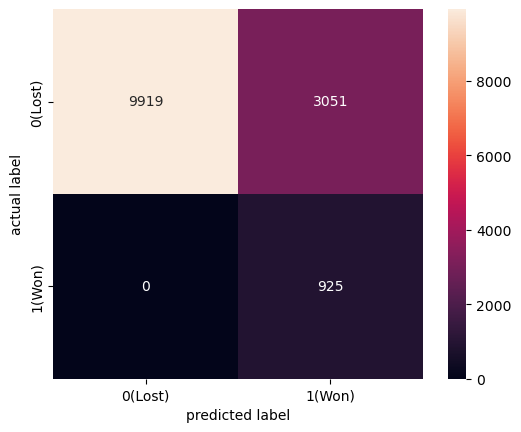

In [84]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,gb_predicted)

sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Lost)', '1(Won)'],
                        yticklabels=['0(Lost)', '1(Won)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

# GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
pipe_gb.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'gb', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__copy', 'preprocessor__num__with_mean', 'preprocessor__num__with_std', 'preprocessor__cat__categories', 'preprocessor__cat__drop', 'preprocessor__cat__dtype', 'preprocessor__cat__handle_unknown', 'preprocessor__cat__sparse', 'gb__ccp_alpha', 'gb__criterion', 'gb__init', 'gb__learning_rate', 'gb__loss', 'gb__max_depth', 'gb__max_features', 'gb__max_leaf_nodes', 'gb__min_impurity_decrease', 'gb__min_samples_leaf', 'gb__min_samples_split', 'gb__min_weight_fraction_leaf', 'gb__n_estimators', 'gb__n_iter_no_change', 'gb__random_state', 'gb__subsample', 'gb__tol', 'gb__validation_fraction', 'gb__verbose', 'gb__warm_start'])

In [87]:
params={
    'gb__learning_rate':[1,0.1,0.001],
    'gb__n_estimators':[150,300,450,600],
    'gb__max_depth':[15,20,25,30]
}

In [88]:
gs=GridSearchCV(pipe_gb,params,n_jobs=-1,cv=5)


In [89]:
gs.fit(X_train_res,y_train_res)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['min_budget',
                                                                          'max_budget']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['lost_reason',
                                                                          'room_type'])])),
                                       ('gb',
                                        GradientBoostingClassifier(learning_rate=0.01,
                                                                   ma

In [90]:
#checking the selected permutation of parameters
gs.best_params_

{'gb__learning_rate': 0.1, 'gb__max_depth': 20, 'gb__n_estimators': 600}

In [91]:
gs.score(X_test,y_test)

0.7906441165887009

In [93]:
gb_clf = GradientBoostingClassifier(n_estimators=600, 
                                    learning_rate=0.1,
                                    max_depth=20)

pipe_gb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('gb', gb_clf)
                          ])

pipe_gb.fit(X_train_res,y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['min_budget', 'max_budget']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['lost_reason',
                                                   'room_type'])])),
                ('gb',
                 GradientBoostingClassifier(max_depth=20, n_estimators=600))])

In [95]:
gb_predicted_2 = pipe_gb.predict(X_test)

In [96]:
print(classification_report(y_test,gb_predicted_2))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     12970
           1       0.24      0.97      0.38       925

    accuracy                           0.79     13895
   macro avg       0.62      0.87      0.63     13895
weighted avg       0.95      0.79      0.84     13895



In [97]:
cm_gb = confusion_matrix(y_test,gb_predicted_2)
cm_gb

array([[10091,  2879],
       [   30,   895]], dtype=int64)

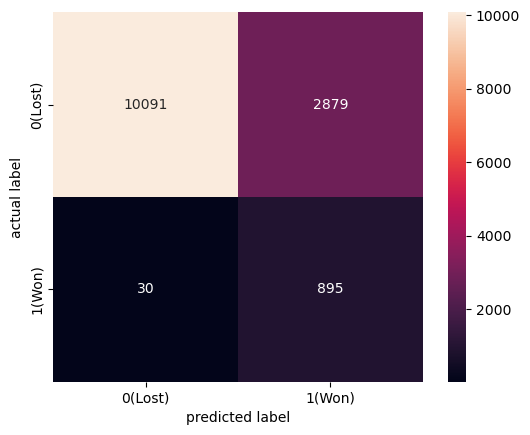

In [98]:
cnf_matrix = confusion_matrix(y_test,gb_predicted_2)

sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Lost)', '1(Won)'],
                        yticklabels=['0(Lost)', '1(Won)'])
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()